In [1]:
import numpy as np
import pandas as pd
import sklearn
from typing import Dict, Tuple
from scipy import stats
from sklearn import datasets
from sklearn import model_selection
from sklearn.datasets import load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

In [2]:
wine = load_wine()

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
wine.data[:13]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02],
       [1.420e+01, 1.760e+00, 2.450e+00, 1.520e+01, 1.120e+02, 3.270e+00,
        3.390e+00, 3.400e-01, 1.970e+00, 6.750e+00, 1.050e+00, 2.850e+00,
        1.45

In [5]:
type(wine.data)

numpy.ndarray

In [6]:
np.unique(wine.target)

array([0, 1, 2])

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
list(zip(np.unique(wine.target), wine.target_names))

[(0, 'class_0'), (1, 'class_1'), (2, 'class_2')]

In [9]:
# Значения целевого признака
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
# Размер выборки
wine.data.shape, wine.target.shape

((178, 13), (178,))

In [11]:
# Сформируем DataFrame
wine_df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [12]:
# И выведем его статистические характеристики
wine_df.describe()

# Для обучения моделей не обязательно создавать DataFrame
# можно использовать массивы numpy

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Подготовка данных

In [13]:
# Подготовка данных
wine_x_ds = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
wine_x_ds_lr = wine_x_ds[['alcohol', 'flavanoids']]
wine_x_ds_lr['x0'] = 1
wine_x_ds_lr['target'] = wine.target
wine_x_ds_lr.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13056\1075460079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_x_ds_lr['x0'] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_13056\1075460079.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_x_ds_lr['target'] = wine.target


,alcohol,flavanoids,x0,target
0,14.23,3.06,1,0
1,13.20,2.76,1,0
2,13.16,3.24,1,0
3,14.37,3.49,1,0
4,13.24,2.69,1,0


In [14]:
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [15]:
bin_wine_y = convert_target_to_binary(wine.target, 0)

In [16]:
wine_x_ds_lr['target_bin'] = bin_wine_y
wine_x_ds_lr.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13056\974887079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_x_ds_lr['target_bin'] = bin_wine_y


,alcohol,flavanoids,x0,target,target_bin
0,14.23,3.06,1,0,1
1,13.20,2.76,1,0,1
2,13.16,3.24,1,0,1
3,14.37,3.49,1,0,1
4,13.24,2.69,1,0,1


C:\Users\user\AppData\Local\Temp\ipykernel_13056\3044211854.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_viz[idx, 0], X_viz[idx, 1],


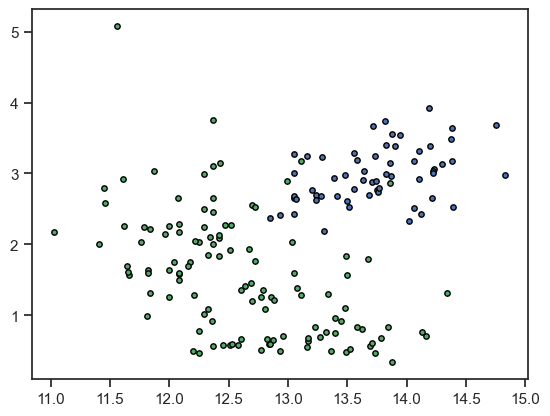

In [17]:
# Визуализация данных
colors = "gb"
#X_viz = iris.data[:, [1,2]]
X_viz = wine_x_ds_lr[['alcohol', 'flavanoids']].values
y_viz = wine_x_ds_lr['target_bin'].values
n_classes = len(np.unique(y_viz))
for i, color in zip(range(n_classes), colors):
    idx = np.where(y_viz == i)
    plt.scatter(X_viz[idx, 0], X_viz[idx, 1], 
                c=color, 
                cmap=plt.cm.RdYlBu, 
                edgecolor='black', s=15)
plt.show()

In [18]:
# Реализация градиентного спуска
def sigmoid(x):
    '''
    Функция - сигмоида
    '''
    return 1 / (1 + np.exp(-x))

def proba(b, x):
    '''
    Вероятность единичного класса
    '''
    return sigmoid(np.dot(x,b))

def cost_function(b, x, y):
    '''
    Функция потерь
    '''
    k = x.shape[0]
    res = -(1 / k) * np.sum(
        y * np.log(proba(b, x)) 
        + (1 - y) * np.log(1 - proba(b, x)))
    return res

def gradient(b, x, y):
    '''
    Определение градиента
    '''
    k = x.shape[0]
    res = (1 / k) * np.dot(
        x.T, (proba(b, x) - y))

def optimize_lr(x, y, b):
    '''
    Для оптимизации используется функция 
    scipy.optimize.fmin_tnc
    '''
    opt_weights = fmin_tnc(
        func=cost_function, 
        x0=b,          
        fprime=gradient,
        approx_grad=True,
        args=(x, y))
    return opt_weights[0] 

In [19]:
opt_x = wine_x_ds_lr[['x0', 'alcohol', 'flavanoids']].values
opt_x[:5]

array([[ 1.  , 14.23,  3.06],
       [ 1.  , 13.2 ,  2.76],
       [ 1.  , 13.16,  3.24],
       [ 1.  , 14.37,  3.49],
       [ 1.  , 13.24,  2.69]])

In [20]:
opt_y = wine_x_ds_lr['target_bin']
opt_y[:5]

0    1
1    1
2    1
3    1
4    1
Name: target_bin, dtype: int64

In [21]:
b_init = np.zeros(3)
b_init

array([0., 0., 0.])

In [22]:
from scipy.optimize import fmin_tnc
b_res = optimize_lr(opt_x, opt_y, b_init)
b_res

C:\Users\user\AppData\Local\Temp\ipykernel_13056\3126456101.py:21: RuntimeWarning: divide by zero encountered in log
  + (1 - y) * np.log(1 - proba(b, x)))
C:\Users\user\AppData\Local\Temp\ipykernel_13056\3126456101.py:21: RuntimeWarning: divide by zero encountered in log
  + (1 - y) * np.log(1 - proba(b, x)))
C:\Users\user\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\user\AppData\Local\Temp\ipykernel_13056\3126456101.py:21: RuntimeWarning: divide by zero encountered in log
  + (1 - y) * np.log(1 - proba(b, x)))
C:\Users\user\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\user\AppData\Local\Temp\ipykernel_13056\3126456101.py:21: RuntimeWarning: divide by zero encountered in log
  + (1 - y) * np.log(1 - proba(b, x)))
C:\Users\user\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeW

array([-11.10840839,   0.42401794,   2.1097742 ])

In [23]:
def vis_lr(b):
    '''
    Визуализация результата
    '''    
    colors = "gb"
    X_viz = wine_x_ds_lr[['alcohol', 'flavanoids']].values
    y_viz = wine_x_ds_lr['target_bin'].values
    n_classes = len(np.unique(y_viz))
    for i, color in zip(range(n_classes), colors):
        idx = np.where(y_viz == i)
        plt.scatter(X_viz[idx, 0], X_viz[idx, 1], 
                    c=color, 
                    cmap=plt.cm.RdYlBu, 
                    edgecolor='black', s=15)

    t1 = wine_x_ds_lr['alcohol'].values    
    t2 = -((b[0]+np.dot(b[1], t1))/b[2])
    plt.plot(t1, t2, 'r', linewidth=2.0)   
    plt.show()  

C:\Users\user\AppData\Local\Temp\ipykernel_13056\544148779.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_viz[idx, 0], X_viz[idx, 1],


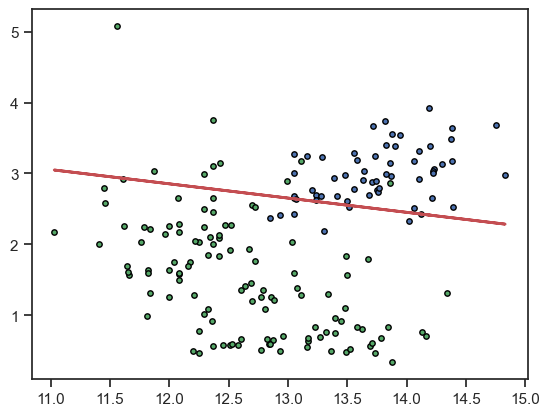

In [24]:
vis_lr(b_res)

## Разделяем выборку на тестовую и обучающую

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine_x_ds_lr[['alcohol', 'flavanoids']].values, 
    wine_x_ds_lr['target_bin'].values, test_size=0.3, random_state=1)

## Логистическая регрессия

In [27]:
cl1 = LogisticRegression()

In [28]:
cl1.fit(wine_X_train, wine_y_train)

LogisticRegression()

In [29]:
pred_wine_y_test = cl1.predict(wine_X_test)
pred_wine_y_test

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [30]:
pred_wine_y_test_proba = cl1.predict_proba(wine_X_test)
pred_wine_y_test_proba[:10]

array([[0.93969011, 0.06030989],
       [0.94033901, 0.05966099],
       [0.13373648, 0.86626352],
       [0.99179808, 0.00820192],
       [0.15318867, 0.84681133],
       [0.96651156, 0.03348844],
       [0.98788521, 0.01211479],
       [0.00857351, 0.99142649],
       [0.99415987, 0.00584013],
       [0.93671187, 0.06328813]])

In [31]:
# Вероятность принадлежности к 0 классу
[round(x, 4) for x in pred_wine_y_test_proba[:10,0]]

[0.9397,
 0.9403,
 0.1337,
 0.9918,
 0.1532,
 0.9665,
 0.9879,
 0.0086,
 0.9942,
 0.9367]

In [32]:
# Вероятность принадлежности к 1 классу
[round(x, 4) for x in pred_wine_y_test_proba[:10,1]]

[0.0603,
 0.0597,
 0.8663,
 0.0082,
 0.8468,
 0.0335,
 0.0121,
 0.9914,
 0.0058,
 0.0633]

In [33]:
# Сумма вероятностей равна 1
pred_wine_y_test_proba[:10,0] + pred_wine_y_test_proba[:10,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Оценка качества

In [34]:
accuracy_score(wine_y_test, pred_wine_y_test)

0.9814814814814815

In [35]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [36]:
print_accuracy_score_for_classes(wine_y_test, pred_wine_y_test)

Метка 	 Accuracy
0 	 0.967741935483871
1 	 1.0


In [37]:
confusion_matrix(wine_y_test, pred_wine_y_test, labels=[0, 1])

array([[30,  1],
       [ 0, 23]], dtype=int64)

## SVM

In [38]:
wine_X = wine.data[:, [0, 6]]
wine_y = wine.target

In [39]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(wine_X, wine_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = wine_X[:, 0], wine_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=wine_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Flavanoids')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

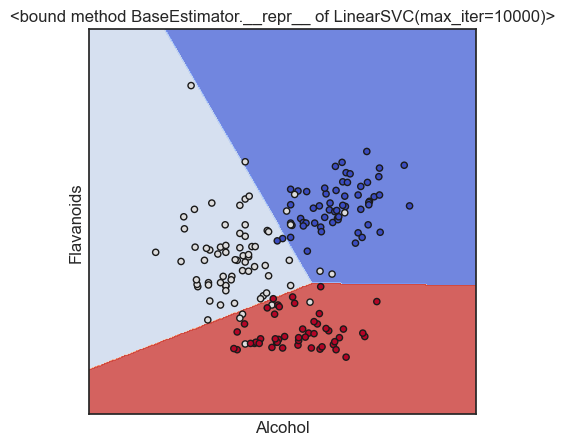

In [40]:
plot_cl(LinearSVC(C=1.0, max_iter=10000))

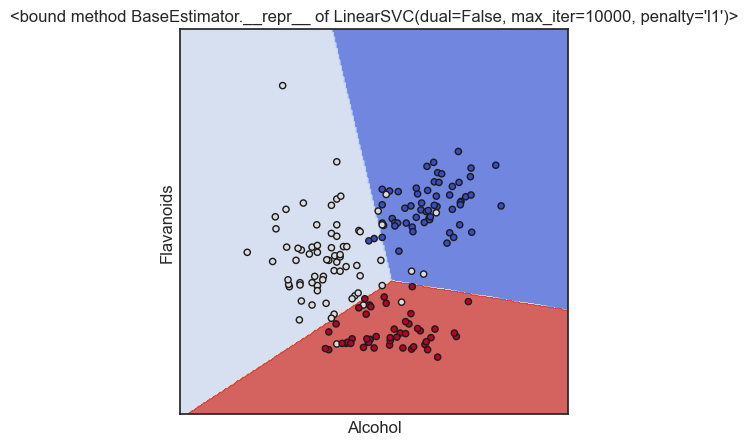

In [41]:
plot_cl(LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000))

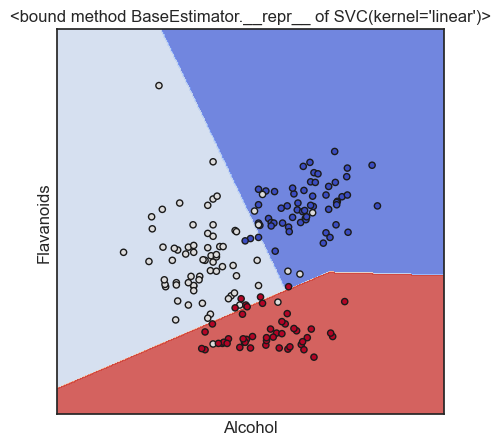

In [42]:
plot_cl(SVC(kernel='linear', C=1.0))

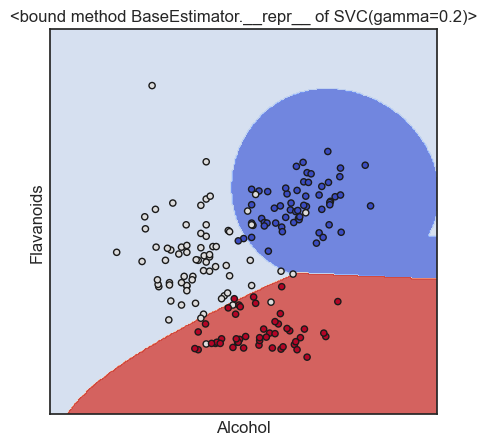

In [43]:
plot_cl(SVC(kernel='rbf', gamma=0.2, C=1.0))

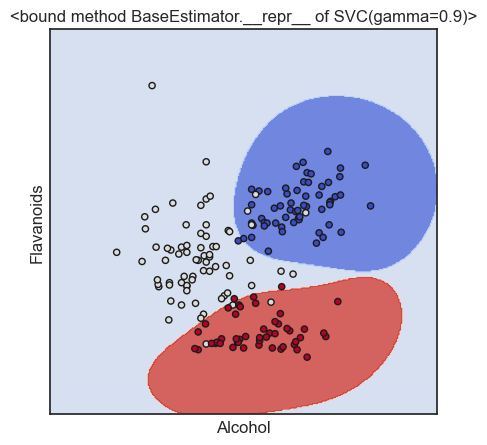

In [44]:
plot_cl(SVC(kernel='rbf', gamma=0.9, C=1.0))

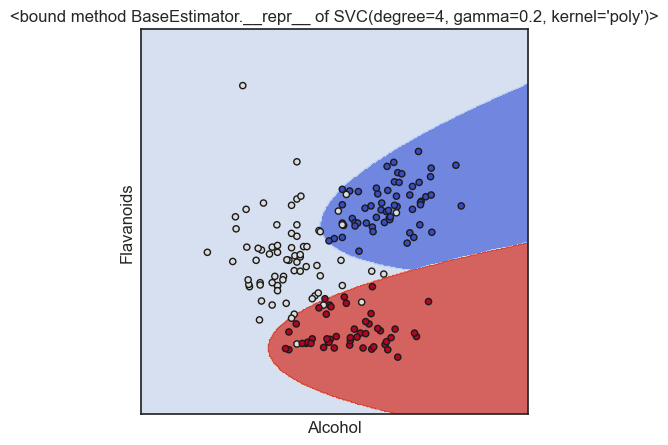

In [45]:
plot_cl(SVC(kernel='poly', degree=4, gamma=0.2, C=1.0))

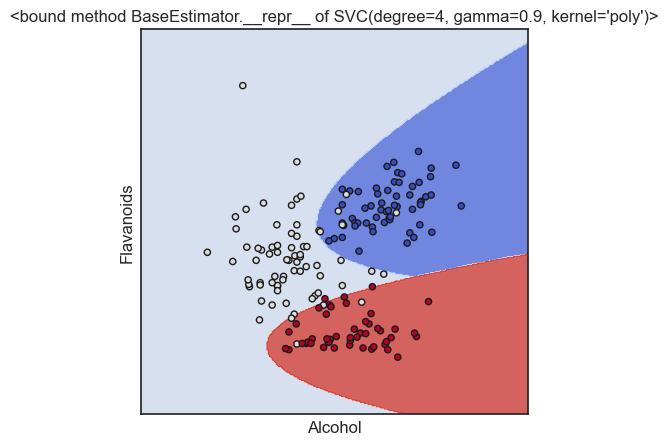

In [46]:
plot_cl(SVC(kernel='poly', degree=4, gamma=0.9, C=1.0))

## Дерево решений

In [48]:
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline 

In [49]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [50]:
wine_x_ds = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
wine_x_ds.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [51]:
def plot_tree_classification(title_param, ds):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """
    
    n_classes = len(np.unique(ds.target))
    plot_colors = "ryb"
    plot_step = 0.02
    
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = ds.data[:, pair]
        y = ds.target

        # Train
        clf = DecisionTreeClassifier(random_state=1).fit(X, y)

        plt.title(title_param)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(ds.feature_names[pair[0]])
        plt.ylabel(ds.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13056\593250511.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


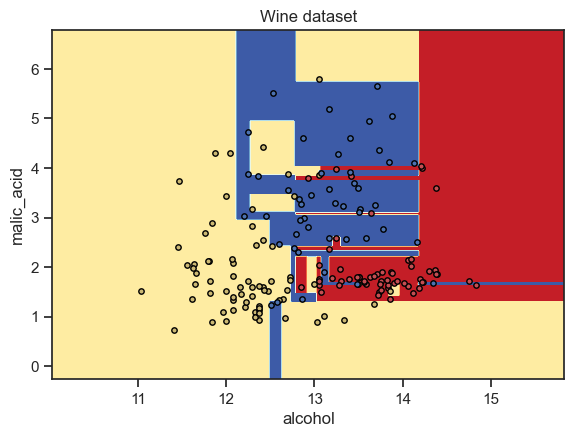

C:\Users\user\AppData\Local\Temp\ipykernel_13056\593250511.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


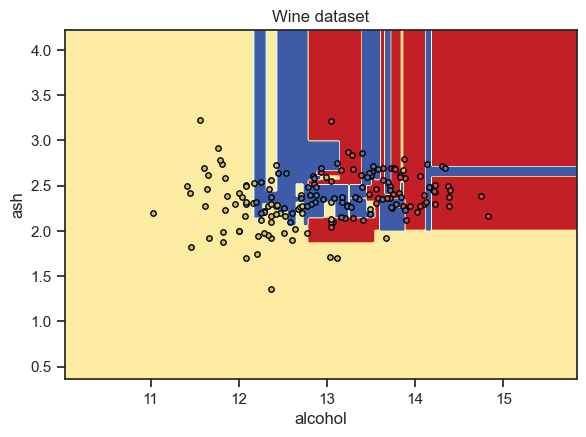

C:\Users\user\AppData\Local\Temp\ipykernel_13056\593250511.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


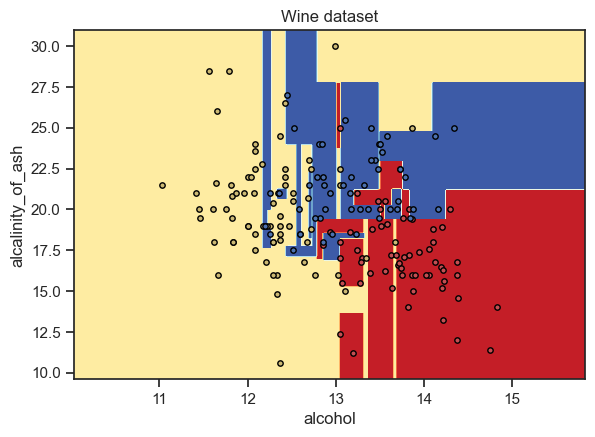

C:\Users\user\AppData\Local\Temp\ipykernel_13056\593250511.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


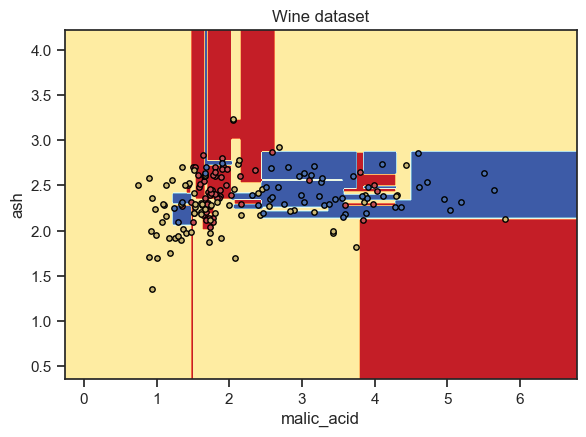

C:\Users\user\AppData\Local\Temp\ipykernel_13056\593250511.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


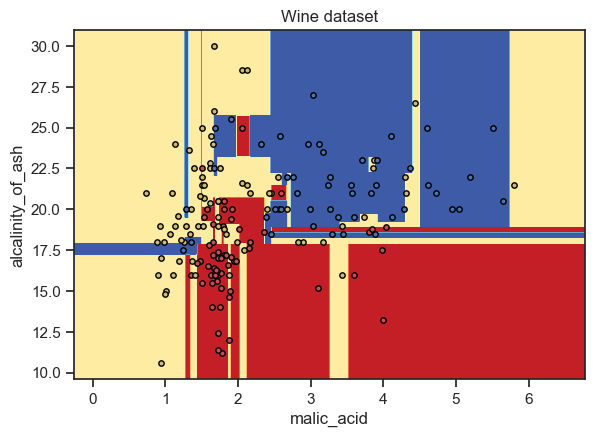

C:\Users\user\AppData\Local\Temp\ipykernel_13056\593250511.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],


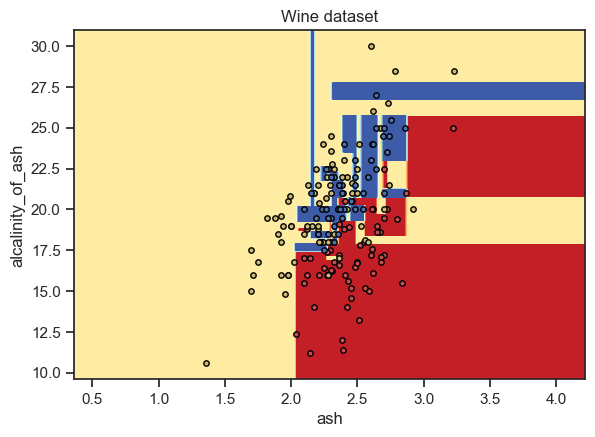

In [52]:
plot_tree_classification('Wine dataset', wine)

In [53]:
# Обучим дерево на всех признаках
wine_tree_cl = DecisionTreeClassifier(random_state=1)
wine_tree_cl.fit(wine_x_ds, wine.target)
wine_tree_cl

DecisionTreeClassifier(random_state=1)

In [54]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(wine_tree_cl, feature_names=list(wine_x_ds.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [55]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

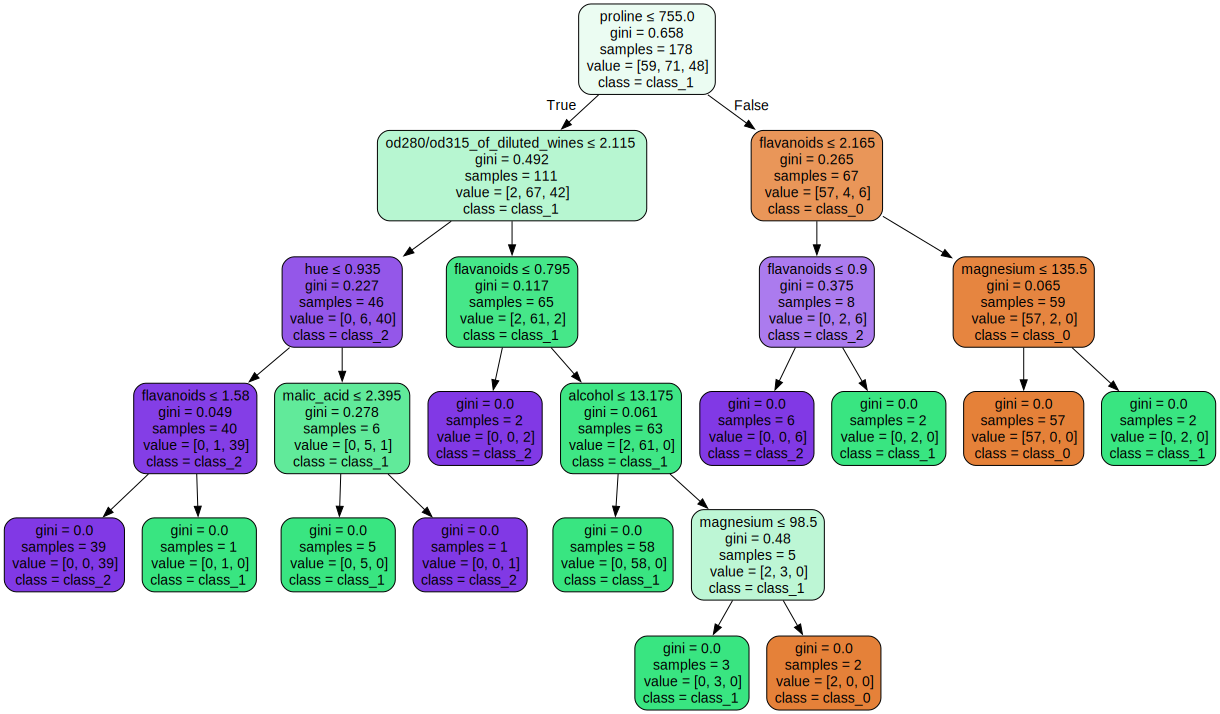

In [56]:
dot_data = export_graphviz(wine_tree_cl, out_file=None, 
                           feature_names=wine.feature_names, 
                           class_names=wine.target_names, 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Важность признаков

In [57]:
# Важность признаков
list(zip(wine_x_ds.columns.values, wine_tree_cl.feature_importances_))

[('alcohol', 0.012570564071187309),
 ('malic_acid', 0.014223159778821876),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0534597951279922),
 ('total_phenols', 0.0),
 ('flavanoids', 0.16704836491408806),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0),
 ('hue', 0.058185091460406506),
 ('od280/od315_of_diluted_wines', 0.3120425747831769),
 ('proline', 0.38247044986432716)]

In [58]:
# Важность признаков в сумме дает единицу
sum(wine_tree_cl.feature_importances_)

1.0

In [59]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

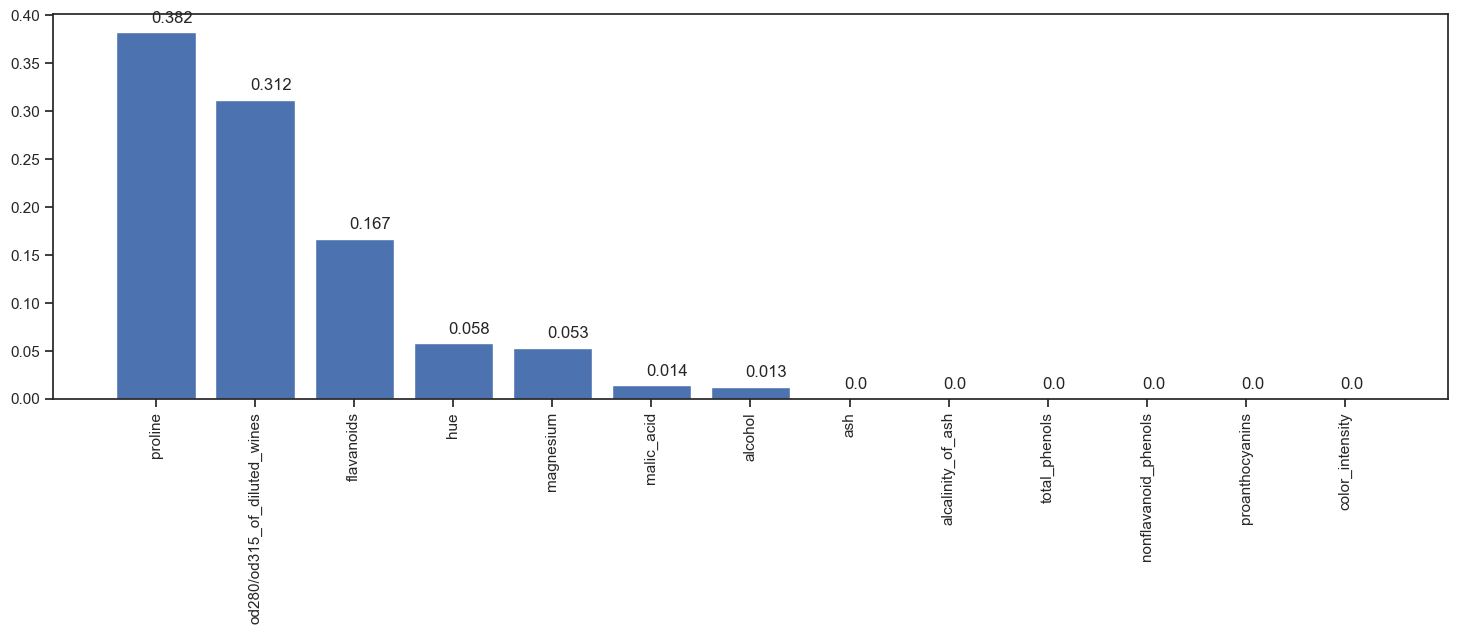

In [60]:
wine_tree_cl_fl, wine_tree_cl_fd = draw_feature_importances(wine_tree_cl, wine_x_ds)

In [61]:
# Список признаков, отсортированный на основе важности, и значения важности
wine_tree_cl_fl, wine_tree_cl_fd

(['proline',
  'od280/od315_of_diluted_wines',
  'flavanoids',
  'hue',
  'magnesium',
  'malic_acid',
  'alcohol',
  'ash',
  'alcalinity_of_ash',
  'total_phenols',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity'],
 [0.38247044986432716,
  0.3120425747831769,
  0.16704836491408806,
  0.058185091460406506,
  0.0534597951279922,
  0.014223159778821876,
  0.012570564071187309,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

In [62]:
wine_x_ds.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [63]:
# Пересортируем признаки на основе важности
wine_x_ds_sorted = wine_x_ds[wine_tree_cl_fl]
wine_x_ds_sorted.head()

,proline,od280/od315_of_diluted_wines,flavanoids,hue,magnesium,malic_acid,alcohol,ash,alcalinity_of_ash,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity
0,1065.0,3.92,3.06,1.04,127.0,1.71,14.23,2.43,15.6,2.80,0.28,2.29,5.64
1,1050.0,3.40,2.76,1.05,100.0,1.78,13.20,2.14,11.2,2.65,0.26,1.28,4.38
2,1185.0,3.17,3.24,1.03,101.0,2.36,13.16,2.67,18.6,2.80,0.30,2.81,5.68
3,1480.0,3.45,3.49,0.86,113.0,1.95,14.37,2.50,16.8,3.85,0.24,2.18,7.80
4,735.0,2.93,2.69,1.04,118.0,2.59,13.24,2.87,21.0,2.80,0.39,1.82,4.32


In [64]:
# Разделим выборку на обучающую и тестовую
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine_x_ds_sorted, wine.target, test_size=0.3, random_state=1)
wine_X_train.shape, wine_X_test.shape

((124, 13), (54, 13))

In [65]:
# Обучим дерево и предскажем результаты на всех признаках 
wine_tree_cl_feat_1 = DecisionTreeClassifier(random_state=1).fit(wine_X_train, wine_y_train)
wine_y_test_predict = wine_tree_cl_feat_1.predict(wine_X_test)
wine_y_test_predict.shape

(54,)

## Оценка качества

In [66]:
# Проверим точность по классам
print_accuracy_score_for_classes(wine_y_test, wine_y_test_predict)

Метка 	 Accuracy
0 	 0.9130434782608695
1 	 0.9473684210526315
2 	 0.9166666666666666


In [67]:
confusion_matrix(wine_y_test, pred_wine_y_test, labels=[0, 1])

array([[ 0, 23],
       [18,  1]], dtype=int64)

In [68]:
# Обучим дерево и предскажем результаты на единственном самом важном признаке 
wine_tree_cl_feat_2 = DecisionTreeClassifier(random_state=1).fit(wine_X_train[[wine_tree_cl_fl[0]]], wine_y_train)
wine_y_test_predict_2 = wine_tree_cl_feat_2.predict(wine_X_test[[wine_tree_cl_fl[0]]])
wine_y_test_predict_2.shape

(54,)

## Оценка качества

In [69]:
# Проверим точность по классам
print_accuracy_score_for_classes(wine_y_test, wine_y_test_predict_2)

Метка 	 Accuracy
0 	 0.8695652173913043
1 	 0.6842105263157895
2 	 0.3333333333333333


In [70]:
confusion_matrix(wine_y_test, pred_wine_y_test, labels=[0, 1])

array([[ 0, 23],
       [18,  1]], dtype=int64)

__Вывод:__ Самое высокое качество у модели логистической регрессии.